# Restaurant Revenue Prediction



# Outline
- [ 1 - Packages ](#1)
- [ 2 - Problem Statement](#2)
- [ 3 - Explore Dataset](#3)
- [ 4 - Prepare data for Traning](#4) 
- [ 5 - Compute Cost](#5)
- [ 6 - Gradient descent ](#6)
- [ 7 - Learning parameters using batch gradient descent ](#7)
- [ 8 - prediction for new data](#8)

### <a name="1"></a>
## 1 - Packages 

First,import all the packages that we will need during this project.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.
- [seaborn](www.seaborn.org) is a data visualization library built on top of Matplotlib. 
- [math](www.math.org) is a built-in Python module for mathematical operations.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### <a name="2"></a>
## 2 - Problem Statements
- This project aims to investigate how the opening of a new restaurant franchise in different cities can potentially affect the profits of the business. The study will use data on profits and populations from cities where the franchise already has restaurants, as well as data on cities that are potential candidates for a new restaurant. The analysis will focus on identifying which cities may provide the highest profits for the franchise, based on the available data.

### <a name="3"></a>
## 3 - Explor Dataset
- Dataset Source - 

### Import the CSV Data as Pandas DataFrame

In [93]:
df=pd.read_csv('restaurant_data.csv')

### Show Top 5 Records

In [94]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Shape of the dataset

In [95]:
df.shape

(97, 2)

##  Dataset information

- Population: City population
- Profit : Profit generated by the restaurant in that city     

### Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check statistics of data set

###  Check Missing values

In [96]:
df.isna().sum()

Population    0
Profit        0
dtype: int64

###### There are no missing values in the data set

###  Check Duplicates

In [97]:
df.duplicated().sum()

0

###### There are no duplicates values in the data set3

In [98]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Checking the number of unique values of each column

In [99]:
df.nunique()

Population    97
Profit        97
dtype: int64

###### There is no categorical value

###  Check statistics of data set¶

In [100]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


###### Insight

- Based on these summary statistics,  we can say that the mean profit value is positive, indicating that on average, the businesses in this dataset are profitable.
- we can see that there is a relatively high degree of variability in both the population and profit values, as evidenced by the relatively high standard deviation values.





###  Exploring Data

In [101]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


###  Exploring Data ( Visualization )

####  Visualize average population distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

####  Histogram & KDE

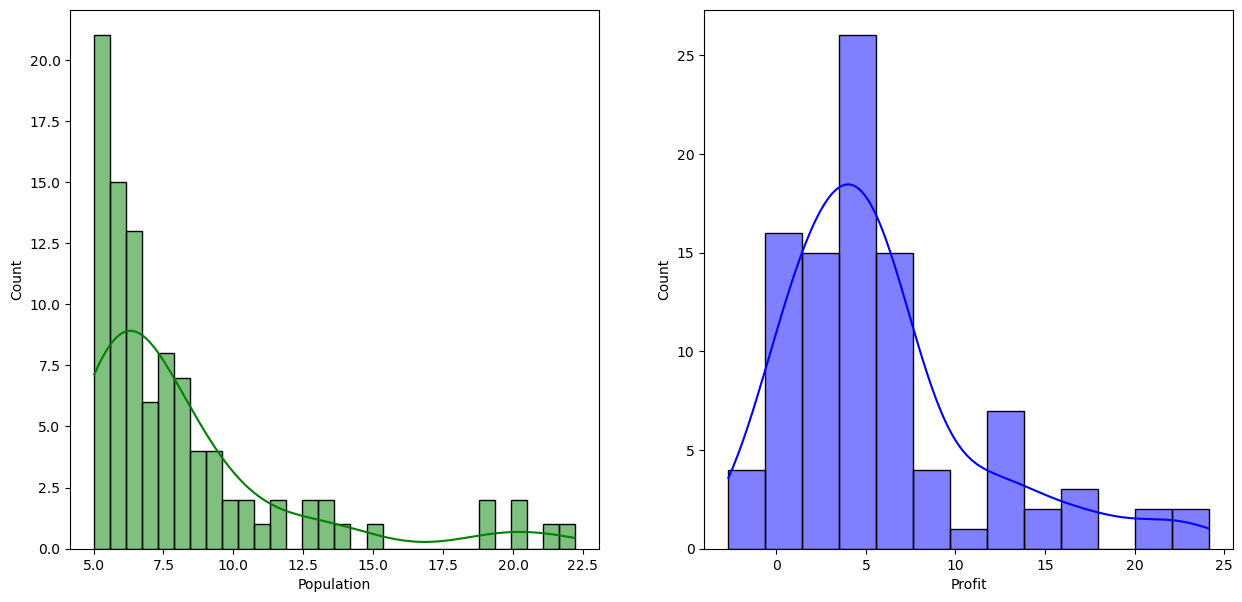

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Population',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Profit',kde=True,color='b')
plt.show()


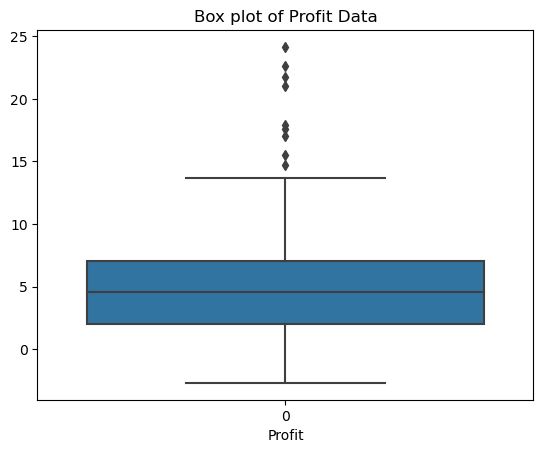

In [103]:
# Create a box plot of the profit data
sns.boxplot(df['Profit'])

# Add labels and title to the plot
plt.xlabel('Profit')
plt.title('Box plot of Profit Data')

# Show the plot
plt.show()

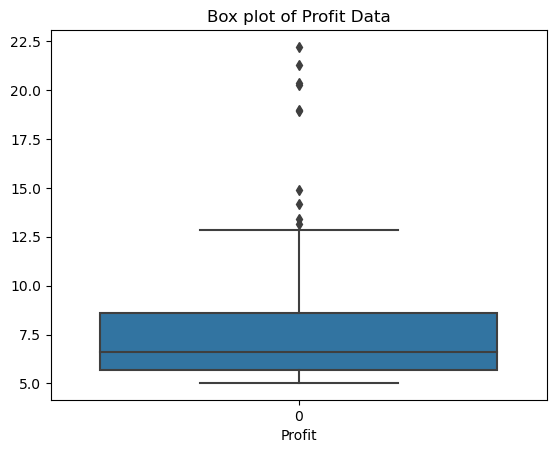

In [104]:
# Create a box plot of the profit data
#boxprops = dict(facecolor='lightblue', edgecolor='blue')

sns.boxplot(df['Population'])

# Add labels and title to the plot
plt.xlabel('Profit')
plt.title('Box plot of Profit Data')

# Show the plot
plt.show()

### <a name="4"></a>

## 5 - Prepare data for Traning

x_train = df['Population'].to_numpy()

In [105]:
x_train


array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [106]:
y_train = df['Profit'].to_numpy()

In [107]:
y_train

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [108]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [109]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [110]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


 The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize your data

Text(0.5, 0, 'Population of City')

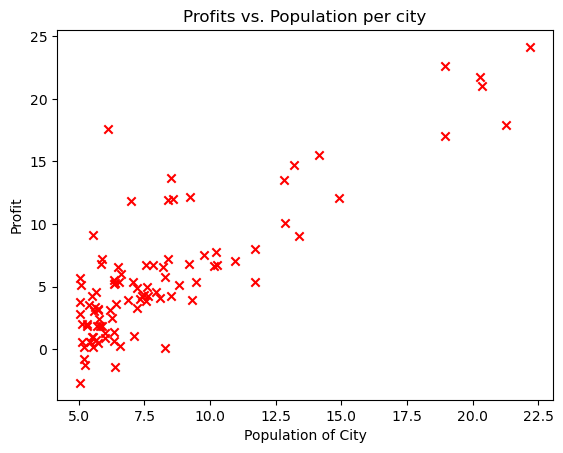

In [111]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit')
# Set the x-axis label
plt.xlabel('Population of City')


## <a name="5"></a>


## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of our parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for us to monitor our progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- we will implement a function to calculate $J(w,b)$ so that we can check the progress of our gradient descent implementation.

- Equation of cost function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


In [112]:

def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0
    
    
    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    
    

    return total_cost

In [113]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)

print(f'Cost at initial w: {cost:.3f}')



Cost at initial w: 75.203


## <a name="6"></a>
## 6 - Gradient descent 

we will implement the gradient for parameters $w, b$ for linear regression. 

 The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

we will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [114]:
def compute_gradient(x, y, w, b): 
    
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [115]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)



Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


## <a name="7"></a>
### 7. Learning parameters using batch gradient descent 

we will now find the optimal parameters of a linear regression model by using batch gradient descent.


In [122]:
def gradient_descent(x, y, learning_rate, num_iterations):
    # Initialize weights and bias to zero
    w = 0
    b = 0
    
    # Initialize list to store the history of w and J
    w_history = []
    J_history = []
    
    # Iterate for num_iterations
    for i in range(num_iterations):
        # Compute gradients
        dw, db = compute_gradient(x, y, w, b)
        
        # Update weights and bias
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing





In [123]:
# initialize fitting parameters
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train,alpha,iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


We will now use the final parameters from gradient descent to plot the linear fit. 

Prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [124]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

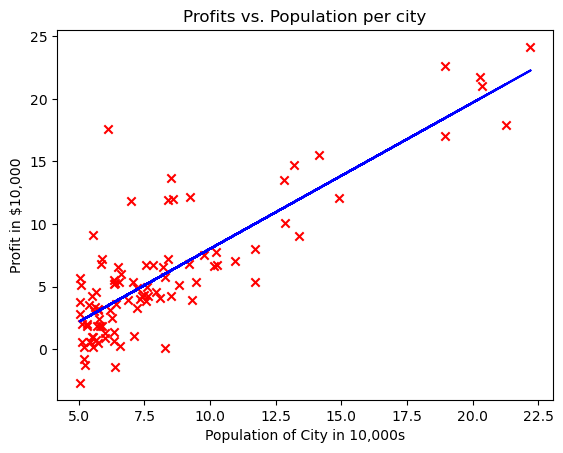

In [125]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')


### <a name="8"></a>
###  8.Prediction for new data

our final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [126]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


In [137]:
predict(3.5)

For population = 35,000, we predict a profit of $4519.77


In [155]:
def predictt(x):
    predict = x * w + b
    print('For population = 35,000, we predict a profit of $%.2f' % (predict*10000))

    


In [156]:
predict(3.5)

TypeError: 'dict' object is not callable

In [157]:
import pickle

In [167]:
# Create a dictionary with the function and parameters
model = {'function': predict, 'w': w, 'b': b}

# Save the model to a pickle file
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
with open('model.pickle', 'rb') as f:
    pickled_model = pickle.load(f)

# Extract the function and parameters from the model
predict_fn = pickled_model['function']
w = pickled_model['w']
b = pickled_model['b']

# Call the predict function with a new data
predict_fn(3.5)

For population = 35,000, we predict a profit of $4519.77
